In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from iminuit import Minuit

In [10]:
#Daten einlesen
with open('eich_ba_120s.txt') as data:
    adcvalue_baeich = np.loadtxt(data, usecols= 0)
with open('eich_ba_120s.txt') as data:
    counts_baeich = np.loadtxt(data, usecols= 1)

with open('eich_co_120s.txt') as data:
    adcvalue_coeich = np.loadtxt(data, usecols= 0)
with open('eich_co_120s.txt') as data:
    counts_coeich = np.loadtxt(data, usecols= 1)

with open('eich_cs_120s.txt') as data:
    adcvalue_cseich = np.loadtxt(data, usecols= 0)
with open('eich_cs_120s.txt') as data:
    counts_cseich = np.loadtxt(data, usecols= 1)

with open('eich_na_120s.txt') as data:
    adcvalue_naeich = np.loadtxt(data, usecols= 0)
with open('eich_na_120s.txt') as data:
    counts_naeich = np.loadtxt(data, usecols= 1)

energy_calibration_y = []
energy_calibration_y_sigma = []
energy_calibration_x = []



In [11]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Methoden Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

#Doppelgaußfit und Linearer Untergrund
#Gaußfits
def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma], absolute_sigma=True)
    return popt[0], popt[1] , popt[2], popt[3], pcov[1,1],pcov[2,2], pcov[3,3]

#Linearfit 
def line(x, a, b):
    return a + x * b

# least-squares score function = sum of data residuals squared
def LSQ(a, b,x,y,sigma_y):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

Amplitude A Na 511: 153.74132836924625
Amplitude A Fehler Na 511: 0.16520923805249693
Erwartungswert mu Na 511: 71.81436482002928
Erwartungswert mu Fehler Na 511: 0.000037
Standardabweichung sigma Na 511: 3.1317394595357735
Standardabweichung sigma Fehler Na 511: 0.000061
Kalibrierungsfaktor Na 511: 7.11556805216608
Feher Kalibrierungsfaktor Na 511: 0.000001
Anzahl gemessener Events in 3 sigma Intervall:  (2407.2549658300823, 2.6725898837759443e-11)
Amplitude A Na 1275: 43.5426271870944
Amplitude A Fehler Na 1275: 0.7514033169782008
Erwartungswert mu Na 1275: 200.2193188147247
Erwartungswert mu Fehler Na 1275: 0.005468
Standardabweichung sigma Na 1275: 7.953790116945466
Standardabweichung sigma Fehler Na 1275: 0.036594
Kalibrierungsfaktor Na 1275: 6.368016870439142
Feher Kalibrierungsfaktor Na 1275: 0.000183
Anzahl gemessener Events in 3 sigma Intervall:  (865.7741164716085, 9.612023633628897e-12)


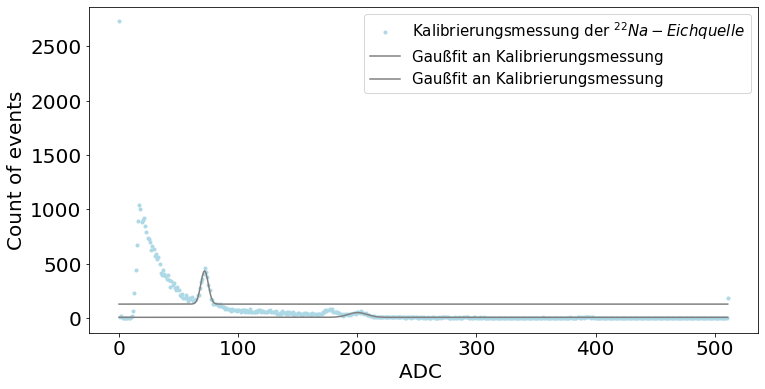

In [12]:
#na-Eichung
adc = adcvalue_naeich
count = counts_naeich

gaussstart = 62
gaussstop = 87
gaussstart2 = 188

gaussstop2 = 220

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC ', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{22}Na-Eichquelle$")

#Gauß 511
H, A, x, sigma, Afehler,fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
ax.plot(adc, gauss(adc, H,A,x,sigma), color = "grey", label="Gaußfit an Kalibrierungsmessung")
photopeak = 511
calibrationfactor = photopeak / x 
calibrationfactorfehler = fehlersd/x
print("Amplitude A Na 511:",A/2)
print("Amplitude A Fehler Na 511:",Afehler/2)
print("Erwartungswert mu Na 511:",x)
print("Erwartungswert mu Fehler Na 511:",'{:f}'.format(fehlermü))
print("Standardabweichung sigma Na 511:",sigma)
print("Standardabweichung sigma Fehler Na 511:",'{:f}'.format(fehlersd))
print("Kalibrierungsfaktor Na 511:",calibrationfactor)
print("Feher Kalibrierungsfaktor Na 511:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x, sigma),x-3*sigma,x+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

#Gauß 1275
H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart2:gaussstop2] , count[gaussstart2:gaussstop2])
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM1275 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM1_173)
ax.plot(adc, gauss(adc, H,A,x,sigma), color = "grey", label="Gaußfit an Kalibrierungsmessung")
co_photopeak = 1275
calibrationfactor = co_photopeak / x 
calibrationfactorfehler = fehlersd/x
print("Amplitude A Na 1275:",A)
print("Amplitude A Fehler Na 1275:",Afehler)
print("Erwartungswert mu Na 1275:",x)
print("Erwartungswert mu Fehler Na 1275:",'{:f}'.format(fehlermü))
print("Standardabweichung sigma Na 1275:",sigma)
print("Standardabweichung sigma Fehler Na 1275:",'{:f}'.format(fehlersd))
print("Kalibrierungsfaktor Na 1275:",calibrationfactor)
print("Feher Kalibrierungsfaktor Na 1275:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(co_photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x, sigma),x-3*sigma,x+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Co 1173: 1156.2115049549705
Amplitude A Fehler Co 1173: 0.347692
Erwartungswert mu Co 1173: 165.142955402115
Erwartungswert mu Fehler Co 1173: 0.000004
Standardabweichung sigma Co 1173: 4.294606976160459
Standardabweichung sigma Fehler Co 1173: 0.000010
Kalibrierungsfaktor Co 1173: 7.102936950255023
Feher Kalibrierungsfaktor Co 1173: 0.000000
Anzahl gemessener Events in 3 sigma Intervall:  (12412.994238087362, 1.3781191986195207e-10)
Amplitude A Co 1333: 1105.5069498291016
Amplitude A Fehler Co 1333: 0.230475
Erwartungswert mu Co 1333: 187.02518706004832
Erwartungswert mu Fehler Co 1333: 0.000005
Standardabweichung sigma Co 1333: 5.321846969464164
Standardabweichung sigma Fehler Co 1333: 0.000009
Kalibrierungsfaktor Co 1333: 7.1273822577277395
Feher Kalibrierungsfaktor Co 1333: 0.000000
Anzahl gemessener Events in 3 sigma Intervall:  (14707.528592370854, 1.63286368801141e-10)


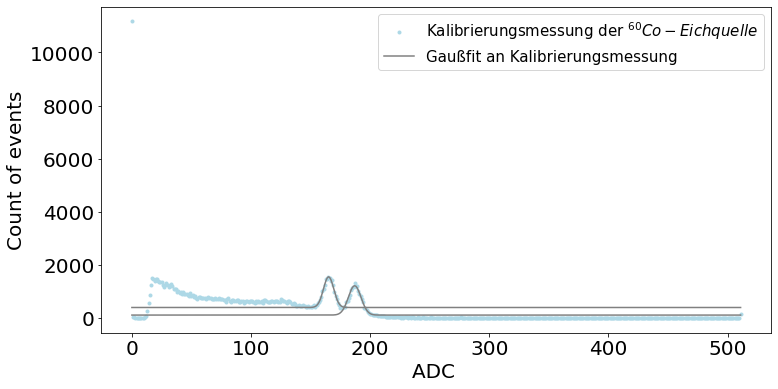

In [13]:
#co-Eichung
adc = adcvalue_coeich
count = counts_coeich

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC ', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{60}Co-Eichquelle$")

#Gauß 1.173
H, A, x, sigma, Afehler,fehlermü, fehlersd = gauss_fit(adc[151:176] , count[151:176])
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM1_173 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM1_173)
ax.plot(adc, gauss(adc, H,A,x,sigma), color = "grey", label="Gaußfit an Kalibrierungsmessung")
photopeak = 1173
calibrationfactor = photopeak / x 
calibrationfactorfehler = fehlersd/x
print("Amplitude A Co 1173:",A)
print("Amplitude A Fehler Co 1173:",'{:f}'.format(Afehler))
print("Erwartungswert mu Co 1173:",x)
print("Erwartungswert mu Fehler Co 1173:",'{:f}'.format(fehlermü))
print("Standardabweichung sigma Co 1173:",sigma)
print("Standardabweichung sigma Fehler Co 1173:",'{:f}'.format(fehlersd))
print("Kalibrierungsfaktor Co 1173:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1173:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x, sigma),x-3*sigma,x+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

#Gauß 1.333
H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[176:210] , count[176:210])
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM1_333 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM1_333)
ax.plot(adc, gauss(adc, H,A,x,sigma), color = "grey")
photopeak = 1333
calibrationfactor = photopeak / x 
calibrationfactorfehler = fehlersd/x
print("Amplitude A Co 1333:",A)
print("Amplitude A Fehler Co 1333:",'{:f}'.format(Afehler))
print("Erwartungswert mu Co 1333:",x)
print("Erwartungswert mu Fehler Co 1333:",'{:f}'.format(fehlermü))
print("Standardabweichung sigma Co 1333:",sigma)
print("Standardabweichung sigma Fehler Co 1333:",'{:f}'.format(fehlersd))
print("Kalibrierungsfaktor Co 1333:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1333:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x, sigma),x-3*sigma,x+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Ba 356: 11490.74364779124
Amplitude A Fehler Ba 356: 0.175811
Erwartungswert mu Ba 356: 49.51723057132451
Erwartungswert mu Fehler Ba 356: 0.000000
Standardabweichung sigma Ba 356: 5.191844433868372
Standardabweichung sigma Fehler Ba 356: 0.000000
Kalibrierungsfaktor Ba 356: 7.1894166109960125
Feher Kalibrierungsfaktor Ba 356: 0.000000
Anzahl gemessener Events in 3 sigma Intervall:  (149137.08454541932, 1.6557542559247906e-09)


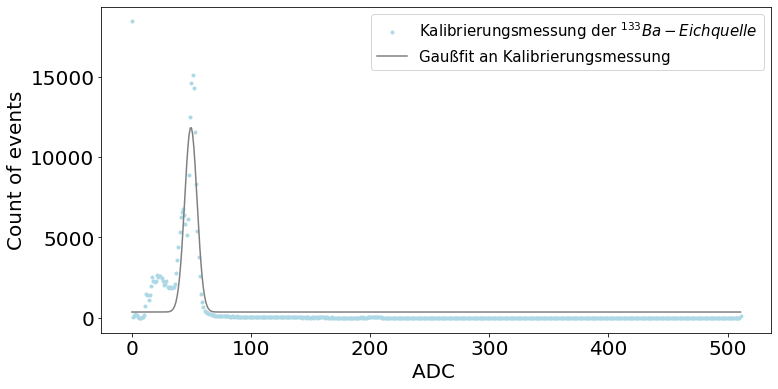

In [14]:
#Ba-Eichung
adc = adcvalue_baeich
count = counts_baeich

gaussstart = 32
gaussstop = 99


parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC ', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{133}Ba-Eichquelle$")

#Gauß 356
H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
ax.plot(adc, gauss(adc, H,A,x,sigma), color = "grey", label="Gaußfit an Kalibrierungsmessung")
photopeak = 356
calibrationfactor = photopeak / x 
calibrationfactorfehler = fehlersd/x
print("Amplitude A Ba 356:",A)
print("Amplitude A Fehler Ba 356:",'{:f}'.format(Afehler))
print("Erwartungswert mu Ba 356:",x)
print("Erwartungswert mu Fehler Ba 356:",'{:f}'.format(fehlermü))
print("Standardabweichung sigma Ba 356:",sigma)
print("Standardabweichung sigma Fehler Ba 356:",'{:f}'.format(fehlersd))
print("Kalibrierungsfaktor Ba 356:",calibrationfactor)
print("Feher Kalibrierungsfaktor Ba 356:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x, sigma),x-3*sigma,x+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Amplitude A Cs 662: 25257.806992950475
Amplitude A Fehler Cs 662: 0.255508
Erwartungswert mu Cs 662: 94.06961617139639
Erwartungswert mu Fehler Cs 662: 0.000000
Standardabweichung sigma Cs 662: 3.533749812238204
Standardabweichung sigma Fehler Cs 662: 0.000000
Kalibrierungsfaktor Cs 662: 7.037341353597373
Feher Kalibrierungsfaktor Cs 662: 0.000000
Anzahl gemessener Events in 3 sigma Intervall:  (223124.51051992833, 2.47717968360206e-09)
Comptonadc und -energie:  67.0 471.501870691024


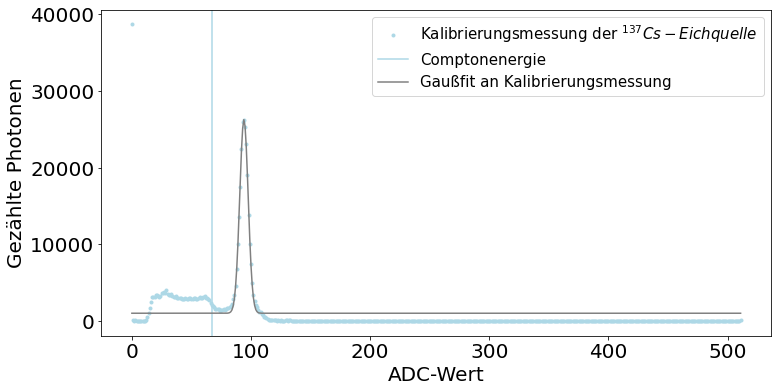

In [15]:
#cs-Eichung
adc = adcvalue_cseich
count = counts_cseich

gaussstart = 73
gaussstop = 123

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC-Wert', fontsize=20)
ax.set_ylabel('Gezählte Photonen', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{137}Cs-Eichquelle$")
ax.axvline(adc[67], color = "lightblue",label = "Comptonenergie")


#Gauß 662
H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM1_173 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM1_173)
ax.plot(adc, gauss(adc, H,A,x,sigma), color = "grey", label="Gaußfit an Kalibrierungsmessung")
photopeak = 662
calibrationfactor = photopeak / x 
calibrationfactorfehler = fehlersd/x
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(fehlermü))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(fehlersd))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x, sigma),x-3*sigma,x+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Steigung: 6.589981893869637
Steigung Fehler: 0.3960086713156773
Y-Abschnitt: 41.71442460019822
Y-Abschnitt Fehler: 55.722595286148774


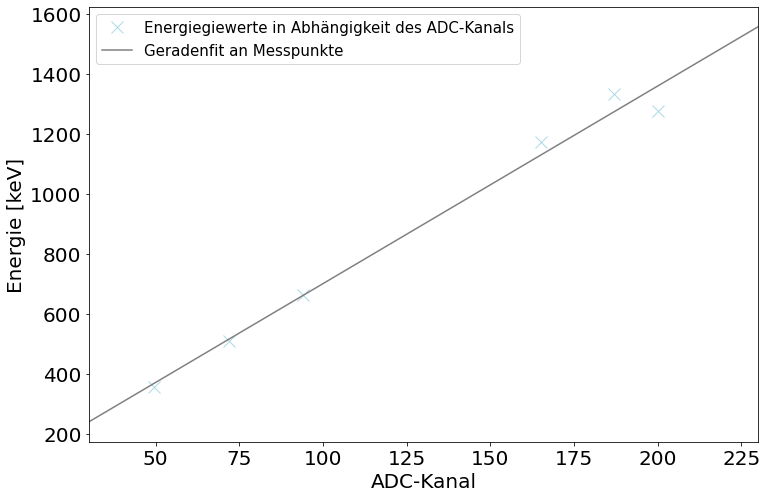

In [16]:
#Energiekalibration
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(30, 230)

#Name for axis
ax.set_xlabel('ADC-Kanal', fontsize=20)
ax.set_ylabel('Energie [keV]', fontsize=20)

#Plotten der unskalierten Kurven
# linear_model=np.polyfit(energy_calibration_x,energy_calibration_y,1)
# linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(30,230)

params, cov = curve_fit(line,energy_calibration_y, energy_calibration_x)
x_fit = np.linspace(30,230)
ax.plot(energy_calibration_y, energy_calibration_x,'x',markersize=12, color = "lightblue",label = "Energiegiewerte in Abhängigkeit des ADC-Kanals")
ax.plot(x_fit, line(x_fit, params[0], params[1]), color = "grey", label="Geradenfit an Messpunkte")
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)